# Майнор Интеллектуальный анализ данных / Введение в анализ данных

## Домашнее задание 3. Логистическая регрессия и случайный лес.

В этом задании вам предстоит:
- поработать с логистической регрессией (полная реализация не потребуется, однако можно заработать бонусные баллы)
- воспроизвести подход случайного леса через одно решающее дерево, поэкспериментировать со случайным лесом.

На все вопросы требуется отвечать развёрнуто, аппелируя к полученным значениям или графикам, ответы вписывать в отдельную ячейку, выбрав для неё тип "Markdown". От полноты и качества ответов будет во многом зависеть ваша итоговая оценка.

Задание выполняется самостоятельно, плагиат будет стандартно наказываться лишением всех баллов за задание.
- Максимальная оценка за задание: 10 баллов.
- Дата выдачи: 28.04.2018
- Срок сдачи: 23:59 18.05.2018

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Часть 0. Подготовка данных.

Для наших экспериентов возьмём обучающую выборку [отсюда](https://www.kaggle.com/iabhishekofficial/mobile-price-classification).

In [2]:
train = pd.read_csv('C:/Users/Daniil/Desktop/train.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Решается задача многоклассовой классификации — определение ценовой категории телефона. Для простоты перейдём к задаче бинарной классификации — пусть исходные классы 0 и 1 соответствуют классу 0 новой целевой переменной, а остальные классу 1.

Замените целевую переменную, отделите её в отдельную переменную и удалите из исходной выборки.

In [3]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1].replace([0, 1, 2, 3], [0, 0, 1, 1])
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Разделите выборку на обучающую и тестовую части в соотношении 7 к 3. Для этого можно использовать `train_test_split` из scikit-learn. Не забудьте зафиксировать сид для разбиения.

In [34]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X, y, random_state = 42, test_size=0.3)

## Часть 1. Логистическая регрессия.

[4 балла]

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$

Не забывайте, что для линейных методов матрицу объекты-признаки необходимо предварительно нормировать (то есть привести каждый признак к одному и тому же масштабу одним из способов). Для этого можно воспользоваться `StandardScaler` или сделать это вручную.

In [44]:
from sklearn.preprocessing import StandardScaler as SS
s = SS()
s.fit(X_train)
X_train = s.transform(X_train)
X_test = s.transform(X_test)
#Использование StandartScaler

Обучите логистическую регрессию. Сделайте предсказания для тестовой части, посчитайте по ним ROC-AUC и Accuracy (порог 0.5). Хорошо ли удаётся предсказывать целевую переменную?

Не забывайте, что метод `predict_proba` вычисляет вероятности обоих классов выборки, а в бинарной классификации нас интересует в первую очередь вероятность принадлежности к положительному классу.

In [97]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import roc_auc_score as roc, accuracy_score as acc
lr = LR()
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)[:,1]
y_pred_new = np.where(y_pred > 0.5, 1, 0) #порог 0.5
print(roc(y_test, y_pred), acc(y_test, y_pred_new))

0.999755531109 0.986666666667


Предсказывать целевую переменную удается достаточно хорошо, качество предельно высокое.

У обученной логистической регрессии есть два аттрибута: `coef_` и `intercept_`, которые соответствуют весам $w$ и $w_0$. Это и есть результат обучения логистической регрессии. Попробуйте с помощью них (с помощью всё той же обученной ранее логистической регрессии) посчитать "сырое" предсказание алгоритма $b(x)$. 

Постройте гистограмму полученных значений и ответьте на вопросы:
- Какие значения принимает такое предсказание?
- Похожи ли эти значения на вероятность классов?

<function matplotlib.pyplot.show>

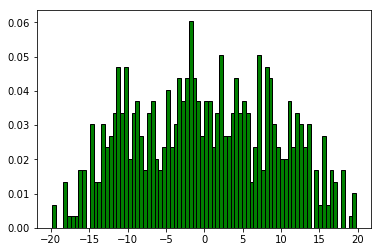

In [98]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.coef_ = lr.coef_
LR.intercept_ = lr.intercept_
y_pred_LR = LR.predict(X_test)
plt.hist(y_pred_LR, 80, normed = True, color = 'green', edgecolor = 'black')
plt.show

Результаты на гистограмме принимают разные значения, лежащие на линейной регрессии. Данное распределение значений не похоже на распределение вероятности классов.

Реализуйте сигмоиду и постройте её график. Что вы можете сказать об этой функции?

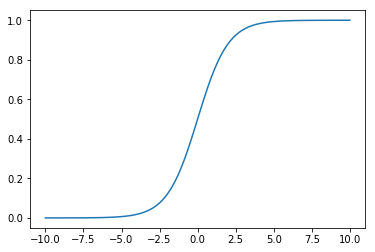

In [71]:
x = np.linspace(-10,10,100)
plt.plot(x, 1/(1 + exp(-x)))

Из построенного графика можно сказать, что сигмоида является гладкой, монотонной, нелинейной функцией, может применятся  для сглаживания значений некоторых величин. 

Примените реализованную сигмоиду к $b(x)$. Вы должны получить вероятности принадлежности к положительному классу. Проверьте, что ваши значения совпали с теми, которые получены с помощью `predict_proba`.

In [100]:
def sigm(x):
    return 1 / (1 + np.exp(-x))
def b(x):
    return lr.intercept_ + np.dot(lr.coef_, x)[0]
z = np.array([sigm(b(x)) for x in X_test]).flatten()
np.array_equal(float32(z), float32(y_pred))

True

Таким образом, обучение логистической регрессии — настройка параметров $w$ и $w_0$, а применение — подсчёт вероятностей принадлежности положительному классу как применение сигмоды к скалярному произведению признаков и параметров.

Постройте для обученной логистической регрессии ROC-кривую `roc_curve` и PR-кривую `precision_recall_curve`.

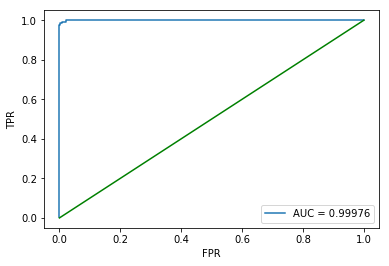

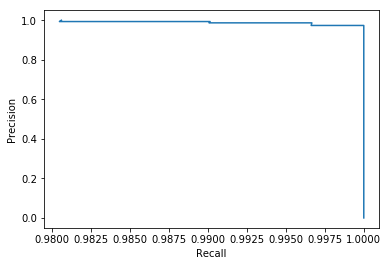

In [90]:
from sklearn.metrics import roc_curve as Roc
from sklearn.metrics import precision_recall_curve as PR
#Построение Roc-кривой
fpr, tpr, threshold = Roc(y_test, y_pred)
plt.plot(fpr, tpr, label = 'AUC = %0.5f' % ROC)
plt.plot([0, 1], [0, 1],'green')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()
plt.show()
#Построение PR-кривой
precision, recall, thresholds = PR(y_test, y_pred)
plt.plot(precision, recall)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

### Бонусное задание. Обучение логистической регрессии.

[2 бонусных балла]

Если выше вручную мы только применяли логистическую регрессию, то здесь предлагается реализовать обучение с помощью полного градиентного спуска.

Если кратко, то обучение логистической регрессии с $L_2$-регуляризацией можно записать следующим образом:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

Считаем, что $y_i \in \{-1, +1\}$, а нулевым признаком сделан единичный (то есть $w_0$ соответствует свободному члену). Искать $w$ будем с помощью градиентного спуска:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

В случае полного градиентного спуска $\nabla_w Q(w, X)$ считается напрямую (как есть, то есть, используя все объекты выборки). Длину шага $\alpha > 0$ в рамках данного задания предлагается брать равной некоторой малой константе.

Градиент по объекту $x_i$ считается по следующей формуле:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_2 w
$$

На самом деле неправильно регуляризировать свободный член $w_0$ (то есть при добавлении градиента для $w_0$ не надо учитывать слагаемое с $\lambda_2$). Но в рамках этого задания мы не обращаем на это внимания и работаем со всеми вектором весов одинаково. 

В качестве критерия останова необходимо использовать (одновременно):
- проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) — параметр tolerance
- достижение максимального числа итераций (например, 10000) — параметр max\_iter.

Инициализировать веса можно случайным образом или нулевым вектором.

Реализуйте обучение логистической регрессии. Для удобства ниже предоставлен прототип с необходимыми методами. В `loss_history` необходимо сохранять вычисленное на каждой итерации значение функции потерь. 

In [ ]:
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, lambda_2=1.0, tolerance=1e-4, max_iter=1000, alpha=1e-3):
        """
        lambda_2: L2 regularization param
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        alpha: learning rate
        """
        self.lambda_2 = lambda_2
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.alpha = alpha
        self.w = None
        self.loss_history = None
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        
        pass
        
        return self
    
    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        
        pass
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        pass

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        pass

1. Примените логистическую регресиию на той же выборке.
2. Посчитайте качество по тем же метрикам.
3. Визуализируйте изменение значений функции потерь от номера итераций.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 2. Случайные леса.

[6 баллов]

Случайный лес — алгоритм машинного обучения, представляющий собой бэггинг над решающими деревьями (усреднение ответов множества слабых алгоритмов) с 2 основными идеями:
- Использование подмножества признаков при построении каждого сплита дерева.
- Бутстрап обучающей выборки для построения каждого дерева (с повторениями).

В этом задании мы попробуем оценить пользу каждой из идей. Будем использовать ту же выборку с тем же разбиением на 2 части. Для начала обучите решающее дерево `DecisionTreeClassifier` из scikit-learn и посчитайте ROC-AUC и Accuracy (порог 0.5). Не забудьте зафикиксировать сид для построения дерева (несмотря на то, что в классической реализации никакой случайности нет, при большой глубине дерева может возникать неоднозначность в выборке признака в сплите). Используйте этот сид для всех заданий ниже.

In [109]:
from sklearn.tree import DecisionTreeClassifier as dtc
clf = dtc(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_test)[:,1]
print(roc(y_test,y_pred))
print(acc(y_test,y_pred))

0.936593659366
0.936666666667


### 2.1 Бэггинг классификаторов

Реализуйте бэггинг над решающими деревьями (усреднение предсказанных вероятностей всего ансамбля). 
В качестве основы используйте всё тот же `DecisionTreeClassifier`. Количество базовых алгоритмов предлагается брать равным 100. 

Посчитайте качество с помощью тех же метрик. Ответьте на следующие вопросы:
- Что интересного вы видите?
- С чем это связано?

In [110]:
tmp = np.zeros(X_test.shape[0])
for i in range(100):  #Количесвто базовых алгоритмов предлагается брать равным 100
    clf = dtc()
    indecies = np.random.choice(np.arange(X_train.shape[0]), size= X_train.shape[0], replace=False)
    y = np.array(y_train)
    clf.fit(X_train[indecies], y[indecies])
    tmp += clf.predict_proba(X_test)[:,1]   #В итоге сумма значений по всем 100 деревьям

y_pred = tmp / 100   #Усреднение значений
print(roc(y_test, y_pred),',', acc(y_test, np.where(y_pred > 0.5, 1, 0)))

0.957390183463 , 0.948333333333


При бэггинге классификаторов качество улучшается. Это связано с тем, что мы берем среднее значение при использовании нескольких деревьев

### 2.2 Сэмплирование обучающей выборки

Добавим к нашему бэггингу бутстрап выборки (генерация случайной выборки того же размера с возвращением). Для этого может пригодиться `numpy.random.randint`.

Посчитайте качество. Что вы видите?

In [95]:
np.random.seed(123)  # для одинакового бутстрапа в каждом запуске
tmp = np.zeros(X_test.shape[0])
for i in range(100):
    clf = dtc()
    indecies = np.random.choice(np.arange(X_train.shape[0]), size= X_train.shape[0], replace = True)
    y = np.array(y_train)
    clf.fit(X_train[indecies], y[indecies])
    tmp += clf.predict_proba(X_test)[:,1]   

y_pred = tmp / 100
print(roc(y_test, y_pred))
print(acc(y_test, np.where(y_pred > 0.5, 1, 0)))

0.993121534376
0.966666666667


При добавлении бутстрапа обучающей выборки качество становится еще лучше.

### 2.3 Выбор случайного подмножества признаков

Временно забудем о бутстрапе выборки и добавим выбор случайного подмножества признаков при построении каждого сплита. В `DecisionTreeClassifier` за это отвечает параметр `max_features`. По умолчанию он имеет значение `None`, что обозначает использование всех возможных признаков. Для задачи классификации рекоменуется использовать квадратный корень от количества признаков. Попробуйте выставить такое значение. На этот раз надо отключить фиксированный сид в построении дерева, так как иначе каждый раз мы будем выбирать одинаковые подмножества признаков. 

Посчитайте качество. Что вы видите?

In [136]:
np.random.seed(123)  # для воспроизводимости построения случайных подмножеств признаков
tmp = np.zeros(X_test.shape[0])
for i in range(100):
    clf = dtc(max_features = 'sqrt')
    y = np.array(y_train)
    clf.fit(X_train, y)
    tmp += clf.predict_proba(X_test)[:,1]

y_pred = tmp / 100
print(roc(y_test, y_pred))
print(acc(y_test, np.where(y_pred > 0.5, 1, 0)))

0.9922381127
0.958333333333


В данном случае качество ухудшилось по сравнению с бэггингом с добавлением бутстрапа, но лучше,чем в двух предшествующих случаях.

### 2.4 = 2.2 + 2.3

Объединим два подхода (бутстрап + выбор подмножества признаков). Получим случайный лес.

Посчитайте качество. Что вы видите?

In [137]:
np.random.seed(123)  # для одинакового бутстрапа и выбора подмножеств признаков в каждом запуске
tmp = np.zeros(X_test.shape[0])
for i in range(100):
    clf = dtc(max_features = 'sqrt')
    indecies = np.random.choice(np.arange(X_train.shape[0]), size= X_train.shape[0], replace = True)
    y = np.array(y_train)
    clf.fit(X_train[indecies], y[indecies])
    tmp += clf.predict_proba(X_test)[:,1]

y_pred = tmp / 100
print(roc(y_test, y_pred))
print(acc(y_test, np.where(y_pred > 0.5, 1, 0)))

0.992960407152
0.958333333333


Качество немного улучшилось, но также меньше, чем при реализации бэггинга с добавлением бутстрапа.

То, что мы сделали уже реализовано в `RandomForestClassifier`. Попробуйте воспользоваться им. Количество используемых деревьев передаётся в параметре `n_estimators`.

Посчитайте качество. Что вы видите?

In [143]:
from sklearn.ensemble import RandomForestClassifier as rfc
clf_r = rfc(n_estimators=100, max_features='sqrt')
clf_r.fit(X_train, y_train)
y_pred = clf_r.predict_proba(X_test)[:,1]
print(roc(y_test, y_pred))
print(acc(y_test, np.where(y_pred > 0.5, 1, 0)))

0.993388227712
0.955


При использовании RandomForestClassifier качество почти одинаково, чуть лучше.

### 2.5 Влияние количества используемых деревьев в случайном лесе

Один из параметров случайного леса — количество деревьев, используемых в бэггинге. Оценим, как влияет этот параметр на финальное качество. Для этого обучите случайные леса с разным количество деревьев (например, перебирайте от 10 до 1000 с шагом в 10), оцените качество с помощью ROC-AUC. Постройте график зависимости ROC-AUC от количества используемых деревьев. Что вы видите?

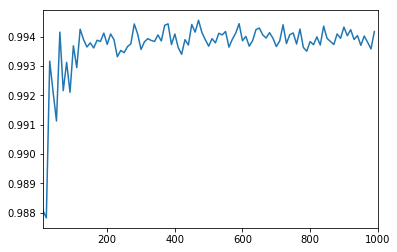

In [144]:
tmp = np.arange(10,1000,10)
res = []
for i in tmp:
    clf_r = rfc(n_estimators = i)
    clf_r.fit(X_train,y_train)
    y_pred = clf_r.predict_proba(X_test)[:,1]
    res.append(roc(y_test, y_pred))
    
plt.plot(tmp,res)
plt.xlim(xmin=10, xmax=1000)
plt.show()

При выборе количества деревьев меньше 150 качество может заметно ращличаться, при выборе от 150 и больше изменения качества незначительны и не столь заметны.

### 2.6 Важность признаков

Случайный лес позволяет оценить важность признаков. У обученного случайного леса есть аттрибут `feature_importances_`, где храниться важность для каждого признака. Постройте `barplot` с важностью признаков (удобно использовать библиотеку `seaborn`, где можно для каждого столбца передать название признака `train.columns`).

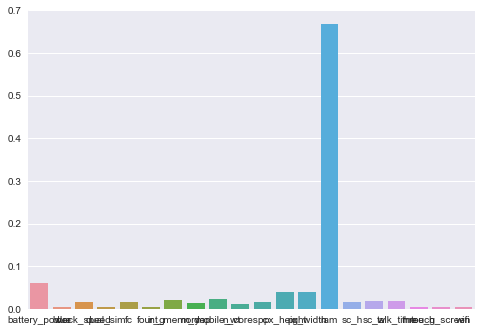

In [145]:
import seaborn as s
s.barplot(x = train.columns[:-1], y = clf_r.feature_importances_ )

## Выводы

Напишите, что интересного вы узнали в этой работе, в каких экспериментах какие результаты получились.

- ...

В данной работе на датасете "Mobile Price Classification" мы посмотрели как работает логистическая регрессия и случайные леса. В данном датасете по важности сильно выделяется один признак. Логистическая регрессия показала лучшее качество, чем леса. В свою очередь при использовании лесов качество улучшалось с помощью реализации бэггинга, становилось еще больше при добавлении бутстрапа выборки.Также качество можно улучшить при выборе случайного подмножества признаков. Количество деревьев влияет на качество, если их меньше 150-200, при большем количестве изменения качества не сильно значимы.